# Analisis exploratorio de los datos

In [5]:
#Imports necesarios
import pandas as pd 
import numpy as np
import seaborn as sns
from tools import load_isra

Utilizando las funciones anteriores vamos a construir la base de datos a partir de las plantillas:

In [6]:
final_df = load_isra(n_examples=107,data_path='./data')
final_df


Problen with value: 0080
Problen with value: 0089


,C1,C2,C3,C4,C5,C6,C7,F1,F2,F3,...,F10,M1,M2,M3,M4,M5,M6,M7,SEXO,A-type
0,27.0,15.0,11.0,12.0,11.0,17.0,11.0,28.0,20.0,37.0,...,16.0,7.0,22.0,24.0,1.0,17.0,19.0,7.0,NaN,A-extrema
1,42.0,24.0,20.0,25.0,27.0,40.0,28.0,38.0,21.0,53.0,...,14.0,20.0,35.0,53.0,16.0,36.0,25.0,19.0,NaN,A-extrema
2,22.0,2.0,7.0,13.0,10.0,21.0,6.0,15.0,2.0,11.0,...,1.0,0.0,7.0,0.0,3.0,2.0,2.0,1.0,NaN,A-marcada
3,32.0,13.0,11.0,14.0,15.0,28.0,15.0,15.0,14.0,29.0,...,12.0,7.0,21.0,26.0,5.0,20.0,13.0,12.0,NaN,A-severa
4,24.0,12.0,10.0,12.0,13.0,25.0,13.0,8.0,16.0,21.0,...,3.0,8.0,31.0,40.0,6.0,20.0,13.0,0.0,NaN,A-severa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,13.0,1.0,2.0,8.0,3.0,7.0,2.0,18.0,4.0,8.0,...,2.0,0.0,17.0,19.0,5.0,15.0,13.0,5.0,NaN,A-marcada
103,31.0,21.0,13.0,22.0,19.0,33.0,20.0,32.0,20.0,43.0,...,5.0,6.0,27.0,17.0,6.0,16.0,21.0,13.0,NaN,A-severa
104,28.0,5.0,10.0,13.0,16.0,24.0,12.0,18.0,10.0,22.0,...,2.0,6.0,15.0,20.0,8.0,23.0,14.0,5.0,NaN,A-severa
105,17.0,10.0,10.0,15.0,10.0,27.0,17.0,9.0,3.0,12.0,...,0.0,0.0,21.0,24.0,8.0,15.0,4.0,0.0,NaN,A-severa


## Caracteristicas de los datos

In [7]:
#Caracteristicas

print(final_df.shape)

print(final_df.describe())

(107, 26)
               C1          C2          C3          C4          C5          C6  \
count  107.000000  107.000000  107.000000  107.000000  107.000000  107.000000   
mean    29.046729   12.457944   10.242991   15.289720   14.943925   26.355140   
std      7.098210    7.082107    5.009126    5.821251    6.477584    8.664885   
min     12.000000    0.000000    0.000000    0.000000    1.000000    6.000000   
25%     25.000000    7.000000    7.000000   12.000000   10.000000   20.000000   
50%     29.000000   12.000000   10.000000   15.000000   15.000000   26.000000   
75%     34.000000   17.500000   13.000000   19.000000   19.000000   33.000000   
max     43.000000   27.000000   20.000000   28.000000   28.000000   44.000000   

               C7          F1          F2          F3  ...          F9  \
count  107.000000  107.000000  107.000000  107.000000  ...  107.000000   
mean    16.037383   21.158879    9.560748   24.598131  ...   17.775701   
std      7.777477    9.493940    6.821

# Principal Component Analisis (PCA)

Como son muchas las variables (features) en el dataset (24). Considero conveniente realizar un PCA, donde se tomen en cuenta los ejes done haya mayor variabilidad. En este caso yo tome los primeros 2. 

Despues se puede trabajar en este espacio con un algoritmo supervisado.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = final_df.iloc[:,0:24]
y = final_df['A-type']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))





(107, 24)
(107,)


<Axes: xlabel='PC1', ylabel='PC2'>

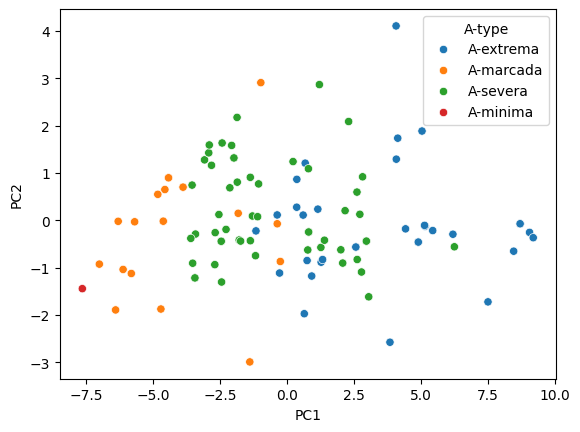

In [24]:
pca =PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])
X_pca['A-type'] = y

sns.scatterplot(data=X_pca,x='PC1',y='PC2',hue=y)


# Modelos de aprendizaje supervisado

Se prueban algunos modelos de aprendizaje supervisado

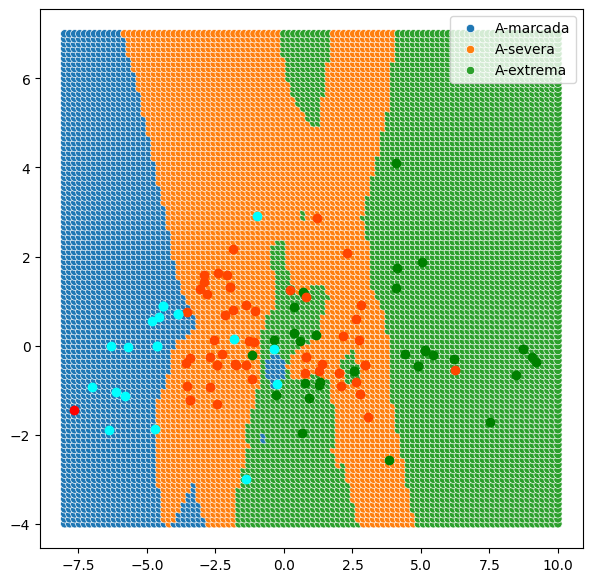

In [36]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from plot_tools import mesh_builder
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
y = final_df['A-type']


lb = LabelBinarizer()

lb.fit(y)
yy = lb.transform(y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca[['PC1','PC2']].values,yy)


xm,ym,zm = mesh_builder([-8,10],[-4,7],100,knn)

z = lb.inverse_transform(zm)

fig,ax = plt.subplots(1,1,figsize=(7,7))
sns.scatterplot(x=xm,y=ym,hue=z,ax=ax)

ax.scatter(X_pca[X_pca['A-type']=='A-extrema']['PC1'],X_pca[X_pca['A-type']=='A-extrema']['PC2'],c='green')
ax.scatter(X_pca[X_pca['A-type']=='A-severa']['PC1'],X_pca[X_pca['A-type']=='A-severa']['PC2'],c='orangered')
ax.scatter(X_pca[X_pca['A-type']=='A-marcada']['PC1'],X_pca[X_pca['A-type']=='A-marcada']['PC2'],c='cyan')
ax.scatter(X_pca[X_pca['A-type']=='A-minima']['PC1'],X_pca[X_pca['A-type']=='A-minima']['PC2'],c='red')
palette = sns.color_palette("dark")
# sns.scatterplot(data=X_pca,x='PC1',y='PC2',hue=y,palette=palette, ax=ax)




## Aprendizaje no supervisado

Algoritmos utilizados: 
    - sklearn.cluster.KMeans

In [20]:
X = final_df.drop(labels=['A-type'], axis=1)
X.drop(labels='SEXO', axis=1, inplace=True)
list(X)

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7']

<Axes: >

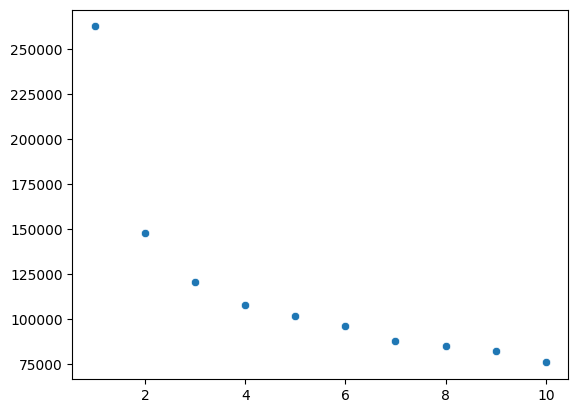

In [21]:
from sklearn.cluster import KMeans


#Exploracion de la cantidad de clusters (Elbow Method)
n_clusters = np.arange(10) + 1
cost_f = []
for i in n_clusters:
    km = KMeans(n_clusters=i)
    km.fit(X)
    cost_f.append(km.inertia_)

sns.scatterplot(x=n_clusters,y=cost_f)


No hay una separacion evidente de clusters

## Clusters + PCA

Misma idea pero trabajando en el espacio de 2 dimensiones de los ejes de variabilidad planteado en el PCA analisis.

c:\Users\Fede\Desktop\proj_bonzi_ml\project\isra_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fede\Desktop\proj_bonzi_ml\project\isra_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fede\Desktop\proj_bonzi_ml\project\isra_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fede\Desktop\proj_bonzi_ml\project\isra_env\Lib\site-packages\sklearn\cluster\_kme

<Axes: >

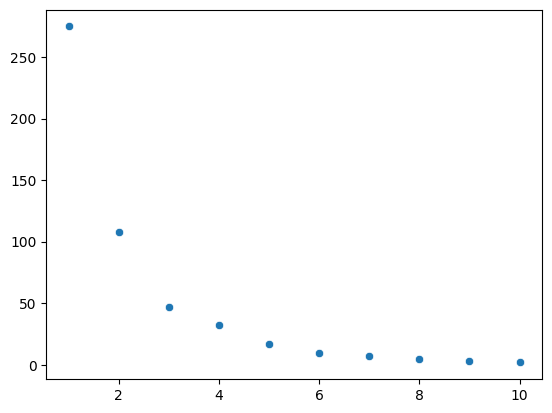

In [13]:
n_clusters = np.arange(10) + 1
cost_f = []
for i in n_clusters:
    km = KMeans(n_clusters=i)
    km.fit(X_pca)
    cost_f.append(km.inertia_)

sns.scatterplot(x=n_clusters,y=cost_f)

Tampoco se avizora una distribucion clara en una determinada cantidad de clusters